#### Random Forest /Krebs Bsp

In [9]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Daten laden

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Trainings- / Testdaten erstellen

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Score-Wert berechnen

In [4]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

1.0
0.972027972027972


Die Relevanz der einzelnen Input-Merkmale ausgeben

In [52]:
# Bei der Ausgabe, der Feature-Importance-Information ist erkennbar,   
#  dass anders als bei Decision Trees, hier auch weniger relevante Attribute
#  Berücksichtigung finden und nicht auf 0 stehen

forest.feature_importances_
# Anwendung pandas DataFrame mit Feature-Namen als Index
used_attributes = pd.DataFrame(forest.feature_importances_, index = cancer.feature_names )
print(used_attributes)

                                0
mean radius              0.025154
mean texture             0.015638
mean perimeter           0.053727
mean area                0.048616
mean smoothness          0.007691
mean compactness         0.009370
mean concavity           0.055395
mean concave points      0.103054
mean symmetry            0.006577
mean fractal dimension   0.002827
radius error             0.029215
texture error            0.006078
perimeter error          0.013429
area error               0.034202
smoothness error         0.003606
compactness error        0.004321
concavity error          0.004488
concave points error     0.006575
symmetry error           0.004606
fractal dimension error  0.006271
worst radius             0.116573
worst texture            0.016031
worst perimeter          0.160277
worst area               0.063469
worst smoothness         0.013564
worst compactness        0.011641
worst concavity          0.039237
worst concave points     0.117118
worst symmetry

Die Relevanz der einzelnen Input-Merkmale visualisierungen 

[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


<BarContainer object of 30 artists>

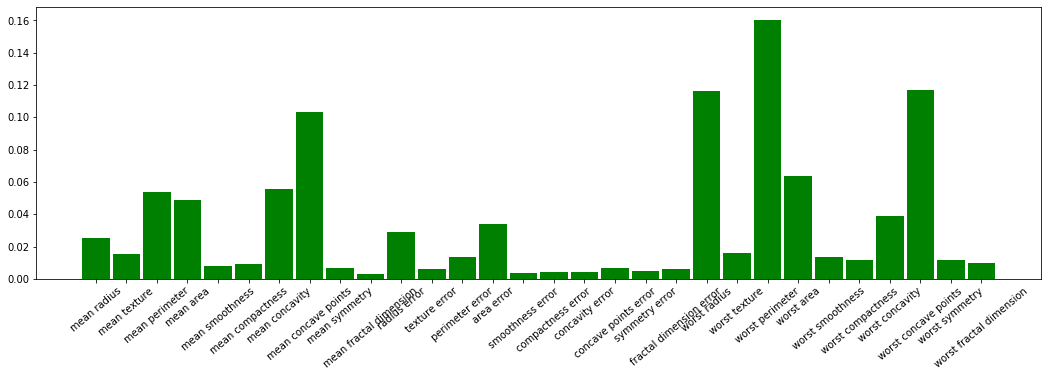

In [51]:
# hierzu werden einfach nur die Relevanz-Werte in 
# forest.feature_importances_ in einem Bar-Plot ausgegeben
print(forest.feature_importances_)
# ein Index mit der Anzahl Werte erzeugen
index = np.arange(len(forest.feature_importances_))
print(index)
label = cancer.feature_names
bar_width = 0.9
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.xticks(index, label, fontsize=10, rotation=40)
plt.bar( index,forest.feature_importances_, bar_width,  color="green")
